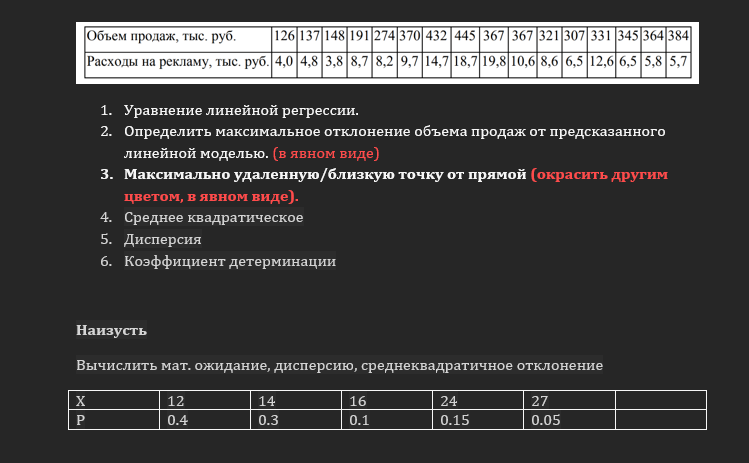

1. Уравнение линейной регрессии: y = 13.52x + 181.12
2. Максимальное отклонение объема продаж от предсказанного: 125.79

Геометрически наиболее удаленная точка:
  Стоимость рекламы: 5.70, Sales: 384,
  Расстояние до линии регрессии: 9.28
4. Среднее квадратическое: 5781.21
5. Дисперсия: 76.03
6. Коэффициент детерминации: 0.42


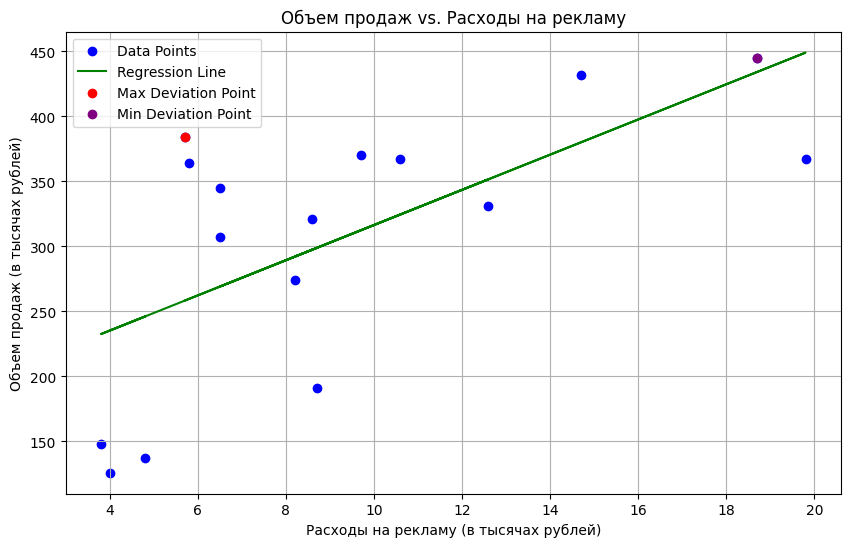


Точка с максимальным отклонением от линейной модели (выделена красным):
  Стоимость рекламы: 5.70, Sales: 384, Error: 125.79

Точка, ближайшая к линейной модели (выделена фиолетовым цветом):
  Стоимость рекламы: 18.70, Sales: 445, Error: 10.98


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Data from the table
sales = np.array([126, 137, 148, 191, 274, 370, 432, 445, 367, 367, 321, 307, 331, 345, 364, 384])
advertising_costs = np.array([4.0, 4.8, 3.8, 8.7, 8.2, 9.7, 14.7, 18.7, 19.8, 10.6, 8.6, 6.5, 12.6, 6.5, 5.8, 5.7])

# 1. Linear Regression
slope, intercept, r_value, p_value, std_err = stats.linregress(advertising_costs, sales)
print(f"1. Уравнение линейной регрессии: y = {slope:.2f}x + {intercept:.2f}")

# 2. Calculate Predicted Sales and Errors
predicted_sales = slope * advertising_costs + intercept
errors = sales - predicted_sales
max_deviation = np.max(np.abs(errors))
print(f"2. Максимальное отклонение объема продаж от предсказанного: {max_deviation:.2f}")
##################################################3
# Calculate the distance of each point to the regression line
distances = np.abs(slope * advertising_costs - sales + intercept) / np.sqrt(slope**2 + 1)

# Find the index of the maximum distance
geometric_max_distance_index = np.argmax(distances)

# Find the maximum distance value
geometric_max_distance = distances[geometric_max_distance_index]

# Print the result
print("\nГеометрически наиболее удаленная точка:")
print(f"  Стоимость рекламы: {advertising_costs[geometric_max_distance_index]:.2f}, Sales: {sales[geometric_max_distance_index]},")
print(f"  Расстояние до линии регрессии: {geometric_max_distance:.2f}")



# 3. Find Max/Min Deviation and Index
max_deviation_index = np.argmax(np.abs(errors))
min_deviation_index = np.argmin(np.abs(errors))

# 4. Mean Squared Error
mse = np.mean(errors ** 2)
print(f"4. Среднее квадратическое: {mse:.2f}")

# 5. Variance
variance = np.sqrt(mse)
print(f"5. Дисперсия: {variance:.2f}")

# 6. Coefficient of Determination (R-squared)
r_squared = r_value**2
print(f"6. Коэффициент детерминации: {r_squared:.2f}")


# Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(advertising_costs, sales, label='Data Points', color='blue')
plt.plot(advertising_costs, predicted_sales, label='Regression Line', color='green')
plt.scatter(advertising_costs[geometric_max_distance_index], sales[geometric_max_distance_index], color='red', label = 'Max Deviation Point')
plt.scatter(advertising_costs[min_deviation_index], sales[min_deviation_index], color='purple', label = 'Min Deviation Point')

plt.xlabel("Расходы на рекламу (в тысячах рублей)")
plt.ylabel("Объем продаж (в тысячах рублей)")
plt.title("Объем продаж vs. Расходы на рекламу")
plt.legend()
plt.grid(True)
plt.show()


# Print the outlier point data
print("\nТочка с максимальным отклонением от линейной модели (выделена красным):")
print(f"  Стоимость рекламы: {advertising_costs[max_deviation_index]:.2f}, Sales: {sales[max_deviation_index]}, Error: {errors[max_deviation_index]:.2f}")

print("\nТочка, ближайшая к линейной модели (выделена фиолетовым цветом):")
print(f"  Стоимость рекламы: {advertising_costs[min_deviation_index]:.2f}, Sales: {sales[min_deviation_index]}, Error: {errors[min_deviation_index]:.2f}")

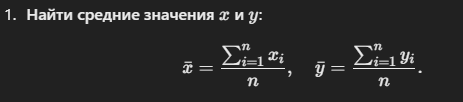
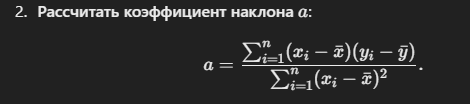

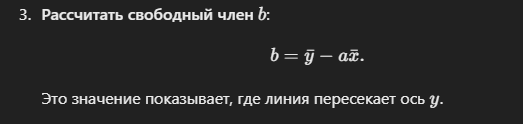

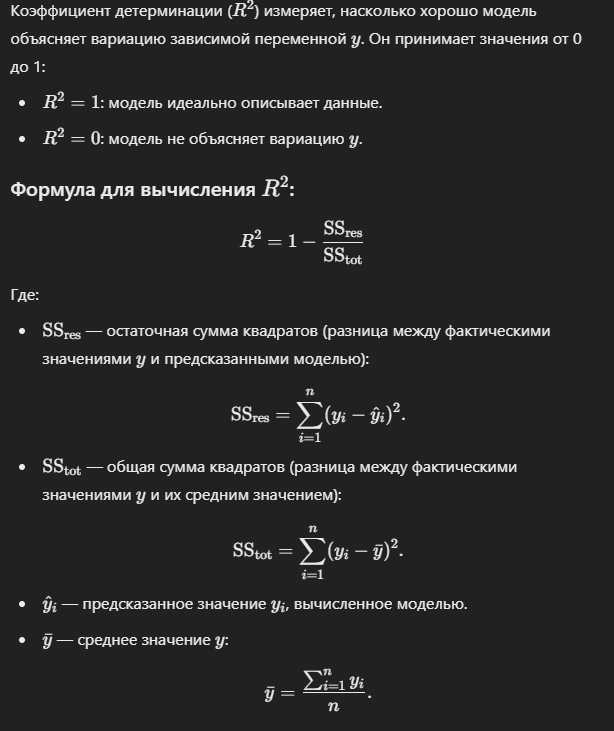